# 6.6: Sourcing & Analyzing Time Series Data

### Import Libraries and Data

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [4]:
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Data Immersion\Achievement 6\NFL Final Project 2'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, 'nfl_geo_spread_analysis.csv'))

In [6]:
df.head()

,Unnamed: 0,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,...,stadium_id,Stadium,home_market,home_name,away_market,away_name,home_division,away_division,home_full_name,away_full_name
0,0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,...,ATL00,Georgia Dome,Atlanta,Falcons,Minnesota,Vikings,NFC South,NFC North,Atlanta Falcons,Minnesota Vikings
1,1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,...,CHI98,Soldier Field,Chicago,Bears,Kansas City,Chiefs,NFC North,AFC West,Chicago Bears,Kansas City Chiefs
2,2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,...,CLE00,Cleveland Browns Stadium,Cleveland,Browns,Pittsburgh,Steelers,AFC North,AFC North,Cleveland Browns,Pittsburgh Steelers
3,3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,...,GNB00,Lambeau Field,Green Bay,Packers,Oakland,Raiders,NFC North,AFC West,Green Bay Packers,Oakland Raiders
4,4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,...,IND99,RCA Dome,Indianapolis,Colts,Buffalo,Bills,AFC South,AFC East,Indianapolis Colts,Buffalo Bills


In [7]:
# Remove unamed : 0 column
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.dtypes

game_id              object
season                int64
game_type            object
week                  int64
gameday              object
weekday              object
gametime             object
away_team            object
away_score          float64
home_team            object
home_score          float64
location             object
actual_spread       float64
actual_total        float64
overtime            float64
away_rest             int64
home_rest             int64
projected_spread    float64
projected_total     float64
div_game              int64
stadium type         object
surface              object
temp                float64
wind                float64
stadium_id           object
Stadium              object
home_market          object
home_name            object
away_market          object
away_name            object
home_division        object
away_division        object
home_full_name       object
away_full_name       object
dtype: object

In [9]:
# Convert gameday to datetime
df['gameday'] = pd.to_datetime(df['gameday'])

In [10]:
# Extract month and year
df['year'] = df['gameday'].dt.year
df['month'] = df['gameday'].dt.month

In [11]:
df.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,home_market,home_name,away_market,away_name,home_division,away_division,home_full_name,away_full_name,year,month
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,Atlanta,Falcons,Minnesota,Vikings,NFC South,NFC North,Atlanta Falcons,Minnesota Vikings,1999,9
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,Chicago,Bears,Kansas City,Chiefs,NFC North,AFC West,Chicago Bears,Kansas City Chiefs,1999,9
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,Cleveland,Browns,Pittsburgh,Steelers,AFC North,AFC North,Cleveland Browns,Pittsburgh Steelers,1999,9
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,Green Bay,Packers,Oakland,Raiders,NFC North,AFC West,Green Bay Packers,Oakland Raiders,1999,9
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,Indianapolis,Colts,Buffalo,Bills,AFC South,AFC East,Indianapolis Colts,Buffalo Bills,1999,9


### Create Subset

In [13]:
# Group by month and year and aggregate
df_sub = df.groupby(['month']).agg({'home_score': 'mean'}).reset_index()

In [14]:
df_sub2 = df.groupby(['year', 'month']).agg({'home_score': 'mean'}).reset_index()

In [15]:
df_sub3 = df.groupby('gameday').agg({'home_score': 'mean'}).reset_index()

In [16]:
df_sub

,month,home_score
0,1,24.853360
1,2,23.000000
2,9,22.928680
3,10,23.248897
4,11,22.842308
5,12,23.351852


In [17]:
df_sub2

,year,month,home_score
0,1999,9,21.454545
1,1999,10,19.565217
2,1999,11,20.866667
3,1999,12,26.316667
4,2000,1,26.615385
...,...,...,...
142,2023,10,22.863014
143,2023,11,22.796610
144,2023,12,24.480000
145,2024,1,23.678571


In [18]:
df_sub3

,gameday,home_score
0,1999-09-12,24.000000
1,1999-09-13,21.000000
2,1999-09-19,19.500000
3,1999-09-20,24.000000
4,1999-09-26,21.538462
...,...,...
1288,2024-01-15,31.500000
1289,2024-01-20,29.000000
1290,2024-01-21,27.500000
1291,2024-01-28,22.000000


In [19]:
df_sub2['date'] = pd.to_datetime(df_sub2[['year', 'month']].assign(day=1))

In [20]:
df_sub2.head()

,year,month,home_score,date
0,1999,9,21.454545,1999-09-01
1,1999,10,19.565217,1999-10-01
2,1999,11,20.866667,1999-11-01
3,1999,12,26.316667,1999-12-01
4,2000,1,26.615385,2000-01-01


In [21]:
df_sub3 = df_sub3.set_index('gameday')
df_sub3.head()

,home_score
gameday,
1999-09-12,24.000000
1999-09-13,21.000000
1999-09-19,19.500000
1999-09-20,24.000000
1999-09-26,21.538462


In [22]:
df_sub3.index

DatetimeIndex(['1999-09-12', '1999-09-13', '1999-09-19', '1999-09-20',
               '1999-09-26', '1999-09-27', '1999-10-03', '1999-10-04',
               '1999-10-10', '1999-10-11',
               ...
               '2023-12-31', '2024-01-06', '2024-01-07', '2024-01-13',
               '2024-01-14', '2024-01-15', '2024-01-20', '2024-01-21',
               '2024-01-28', '2024-02-11'],
              dtype='datetime64[ns]', name='gameday', length=1293, freq=None)

In [23]:
# Set the frequency to monthly
df_sub3 = df_sub3.asfreq('MS')
df_sub3.index

DatetimeIndex(['1999-10-01', '1999-11-01', '1999-12-01', '2000-01-01',
               '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01',
               ...
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01'],
              dtype='datetime64[ns]', name='gameday', length=293, freq='MS')

In [24]:
df_sub2 = df_sub2.set_index('date') # Set date as the index of the dataframe
df_sub2.drop('month', axis=1, inplace=True)
df_sub2.drop('year', axis=1, inplace=True)
df_sub2.head()

,home_score
date,
1999-09-01,21.454545
1999-10-01,19.565217
1999-11-01,20.866667
1999-12-01,26.316667
2000-01-01,26.615385


In [25]:
df_sub = df_sub.set_index('month') # Set the month as the index of the dataframe.
df_sub.head()

,home_score
month,
1,24.853360
2,23.000000
9,22.928680
10,23.248897
11,22.842308


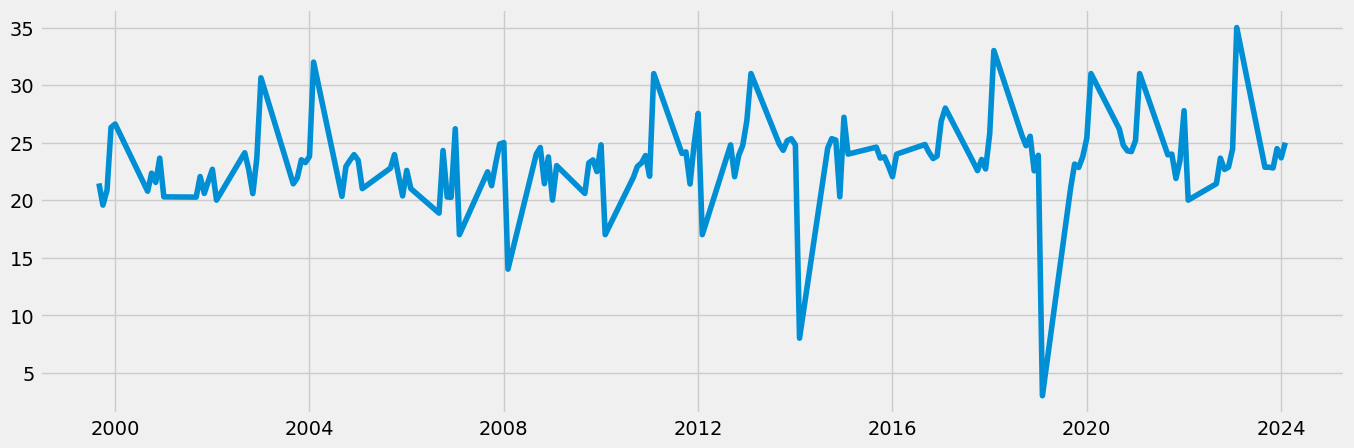

In [26]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub2)

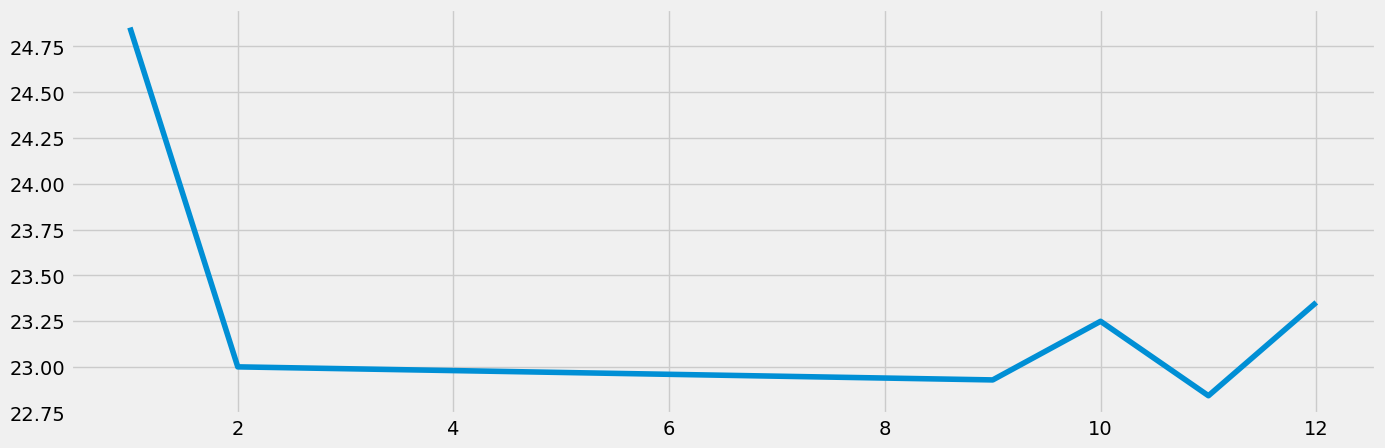

In [27]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [28]:
df_sub3.head()

,home_score
gameday,
1999-10-01,NaN
1999-11-01,7.0
1999-12-01,NaN
2000-01-01,NaN
2000-02-01,NaN


##### I decided to analyze the average scores for home teams throughout the months and it's pretty much the same throughout the season.

### Decomposition

In [31]:
type(df_sub2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
df_sub2.index

DatetimeIndex(['1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01', '2000-09-01', '2000-10-01', '2000-11-01',
               '2000-12-01', '2001-01-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01'],
              dtype='datetime64[ns]', name='date', length=147, freq=None)

In [42]:
type(df_sub3.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [36]:
type(df_sub.index)

pandas.core.indexes.base.Index

In [50]:
# Decompose the time series using an additive model
decomposition = seasonal_decompose(df_sub2, model='additive', period=1)

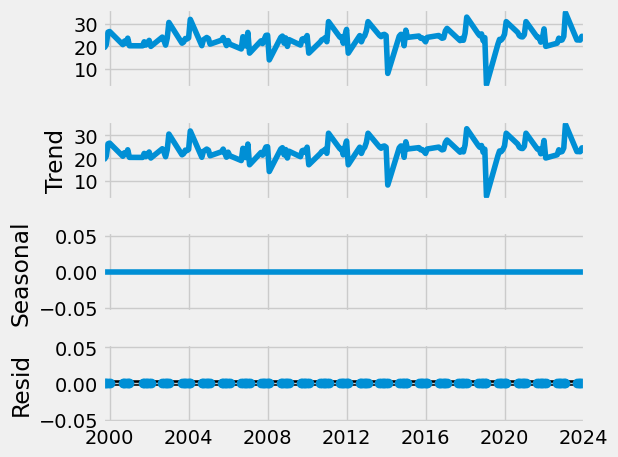

In [52]:
# Plot the decomposed components
decomposition.plot()
plt.show()

##### From what I can on a yearly and seasonal basis the average points scored by the home NFL team is remains stagnant with no clear upward and downward trends.

### Testing for Stationarity

In [61]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub2['home_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.128343e+01
p-value                        1.437394e-20
Number of Lags Used            0.000000e+00
Number of Observations Used    1.460000e+02
Critical Value (1%)           -3.475953e+00
Critical Value (5%)           -2.881548e+00
Critical Value (10%)          -2.577439e+00
dtype: float64


##### Based on the stationarity test results with an extremely low p-value. We can conclude the time-series is stationary.

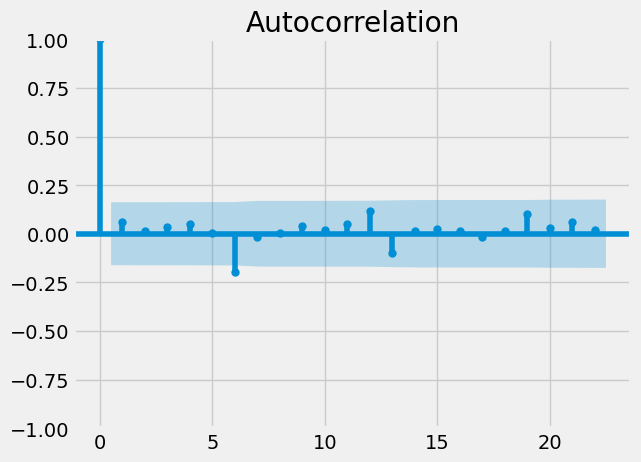

In [65]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub2)
plt.show()

#### Interpretation:

##### Significant Lags: The lags where the blue lines extend beyond the shaded area indicate significant autocorrelation. These lags show a strong relationship between the time series values and their past values.
##### Non-Significant Lags: Most of the lines are within the shaded area, suggesting that the autocorrelations at those lags are not statistically significant.